<a href="https://colab.research.google.com/github/Prajwal-Katuwal/Worksheet_AI/blob/main/2548856_PrajwalKatuwal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset: Road Traffic Accident Dataset of Addis Ababa City**

**Task: Classify the severity of the accidents.**

**UNSDG: SDG 3: Good health and wealth being.**

Import libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest, mutual_info_classif

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

**1. Exploratory Data analysis and Data understanding**

loading dataset:

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/RTA Dataset.csv')

1A. When and by whom was the dataset created?:

**-> This dataset was created on 2021 and by Addis Ababa Science and Technology University.**

1B. How and from where is the dataset accessed?

**->Dataset is from kaggle.com and it is accessed by downloading the CSV file.**

1C. Justification of alignment with the selected UNSDG?

**-> This dataset aligns with Sustainable Development Goal 3 (Good Health and Well-being) as it focuses on reducing injuries and fatalities caused by road traffic accidents.**



This dataset should be able to answer questions like:


**->What factors most strongly influence accident severity?**

**->How do road and weather conditions affect accident outcomes?**

**->Does driver experience or vehicle type increase the likelihood of severe accidents?**

**1.2 Data exploration and cleaning**

2A. Data cleaning and computing summary statistics

In [ ]:
# Convert string 'na' values to real NaN
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].replace(["na", "NA", "N/A", ""], np.nan)

df.isna().mean().sort_values(ascending=False).head(10)

# Drop rows with missing target
df = df.dropna(subset=["Accident_severity"])


**2A. Statistics summary**

In [ ]:
df.describe(include="all")


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,7873,7873,7873,7873,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,3,2,5,3,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,3145,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**2B. Data Visualization**

1. Target distribution

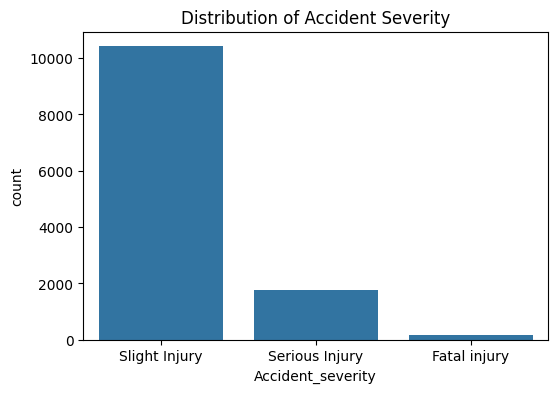

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Accident_severity")
plt.title("Distribution of Accident Severity")
plt.show()


2. Severity vs Road surface

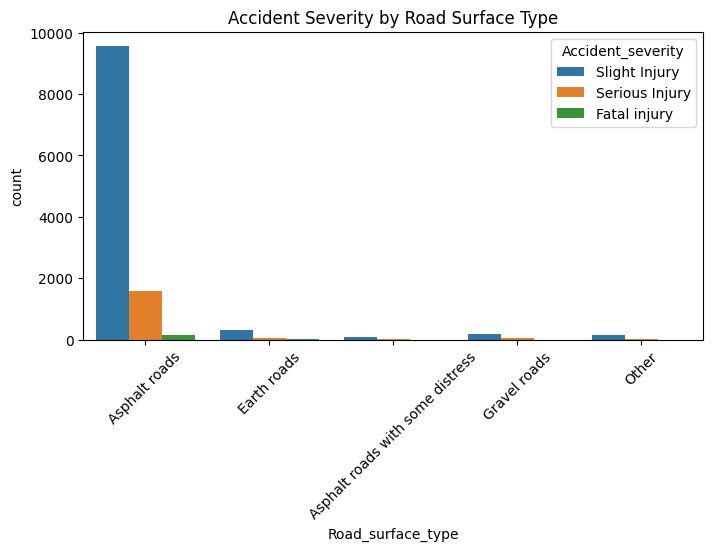

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="Road_surface_type", hue="Accident_severity")
plt.xticks(rotation=45)
plt.title("Accident Severity by Road Surface Type")
plt.show()


**3. Severity VS light conditions**

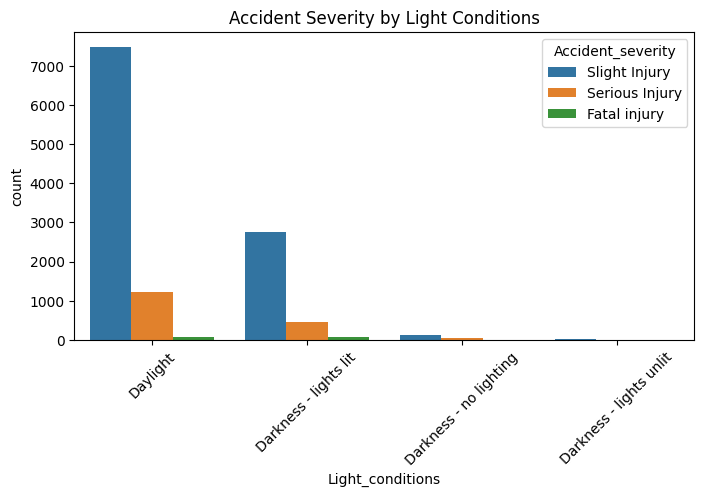

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="Light_conditions", hue="Accident_severity")
plt.xticks(rotation=45)
plt.title("Accident Severity by Light Conditions")
plt.show()


**Severity VS Vehicle type**

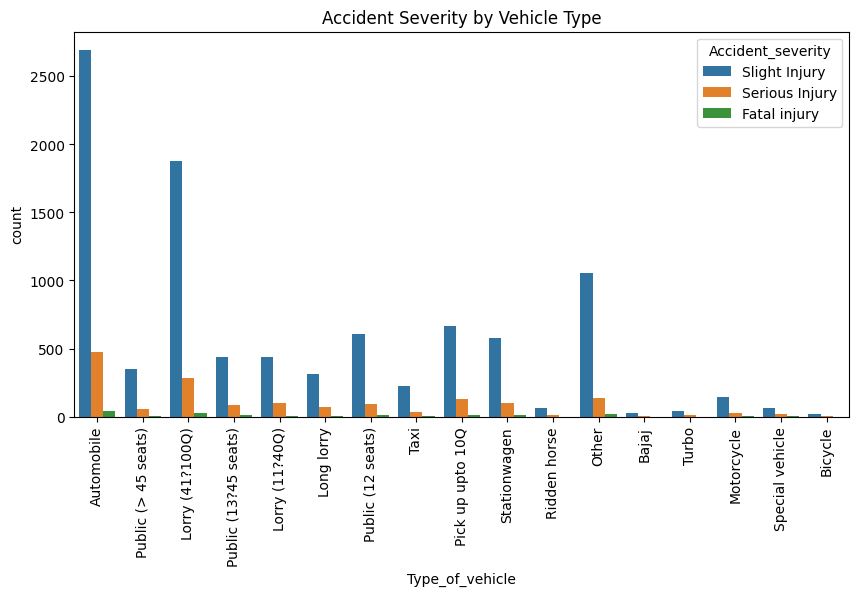

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Type_of_vehicle", hue="Accident_severity")
plt.xticks(rotation=90)
plt.title("Accident Severity by Vehicle Type")
plt.show()


1C. Ensure you clearly explain and summarize the insights from each visualization.


**->The target variable is imbalanced**


**->Road surface and lighting conditions show visible relationships with accident severity**


**->Vehicle-related features appear informative and were retained for model training.**

**2. Building A Neural Network Model**

Building MLP Classifier

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identify columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

# Preprocessing pipeline
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)


In [ ]:
# Architecture:
# Input layer: handled automatically by sklearn (depends on one-hot encoded features)
# Hidden layers: 2 layers (64 neurons, then 32 neurons)
# Output layer: 3 neurons (3 classes) handled automatically

mlp_clf = Pipeline([
    ("prep", preprocess),
    ("model", MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        max_iter=300,
        random_state=42,
        early_stopping=True
    ))
])


Training and evaluating both train and test models

In [ ]:
def evaluate_nn(model, X_train, y_train, X_test, y_test):
    # --- Ensure y is 1D numpy arrays ---
    y_train = np.asarray(y_train).ravel()
    y_test  = np.asarray(y_test).ravel()

    # --- If labels are non-numeric (strings/objects), encode them ---
    le = None
    if y_train.dtype == "object" or isinstance(y_train[0], str):
        le = LabelEncoder()
        y_train = le.fit_transform(y_train)
        y_test  = le.transform(y_test)

    # --- Fit + predict ---
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test  = model.predict(X_test)

    # --- Metrics ---
    def scores(y_true, y_pred):
        acc = accuracy_score(y_true, y_pred)
        p, r, f1, _ = precision_recall_fscore_support(
            y_true, y_pred, average="weighted", zero_division=0
        )
        return acc, p, r, f1

    train_acc, train_p, train_r, train_f1 = scores(y_train, pred_train)
    test_acc,  test_p,  test_r,  test_f1  = scores(y_test,  pred_test)

    print("=== TRAIN RESULTS ===")
    print("Accuracy:", train_acc)
    print("Precision:", train_p)
    print("Recall:", train_r)
    print("F1-score:", train_f1)

    print("\n=== TEST RESULTS ===")
    print("Accuracy:", test_acc)
    print("Precision:", test_p)
    print("Recall:", test_r)
    print("F1-score:", test_f1)

    # If we encoded, show original class names in reports
    if le is not None:
        labels = np.arange(len(le.classes_))
        target_names = le.classes_
        print("\nClassification Report (Test):")
        print(classification_report(y_test, pred_test, labels=labels, target_names=target_names, zero_division=0))
        print("\nConfusion Matrix (Test):")
        print(confusion_matrix(y_test, pred_test, labels=labels))
    else:
        print("\nClassification Report (Test):")
        print(classification_report(y_test, pred_test, zero_division=0))
        print("\nConfusion Matrix (Test):")
        print(confusion_matrix(y_test, pred_test))

# call it
evaluate_nn(mlp_clf, X_train, y_train, X_test, y_test)


=== TRAIN RESULTS ===
Accuracy: 0.8775883069427527
Precision: 0.8552471895241459
Recall: 0.8775883069427527
F1-score: 0.8539079619418353

=== TEST RESULTS ===
Accuracy: 0.8352272727272727
Precision: 0.7793519125478146
Recall: 0.8352272727272727
F1-score: 0.7953713022112885

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.38      0.13      0.19       349
           2       0.86      0.97      0.91      2084

    accuracy                           0.84      2464
   macro avg       0.41      0.36      0.37      2464
weighted avg       0.78      0.84      0.80      2464


Confusion Matrix (Test):
[[   0    1   30]
 [   0   44  305]
 [   0   70 2014]]


Training and evaluating the neural network model

In [ ]:
TARGET = "Accident_severity"

# --- X and y (force y to string, then encode) ---
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(str)   # important: ensures consistent type

le = LabelEncoder()
y_enc = le.fit_transform(y).astype(np.int64)  # ensure numeric dtype

print("Encoded classes mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
print("y_enc dtype:", y_enc.dtype)

# --- Split (stratify on encoded labels) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

print("y_train dtype:", y_train.dtype, "unique:", np.unique(y_train))

# --- Preprocess ---
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

preprocess = ColumnTransformer([
    ("num", Pipeline([("imp", SimpleImputer(strategy="median"))]), numeric_cols),
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("oh", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_cols)
])

# --- MLP (turn OFF early_stopping to avoid extra internal scoring) ---
mlp_clf = Pipeline([
    ("prep", preprocess),
    ("model", MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        max_iter=300,
        random_state=42,
        early_stopping=False
    ))
])

# --- Fit + Evaluate ---
mlp_clf.fit(X_train, y_train)

pred_train = mlp_clf.predict(X_train)
pred_test  = mlp_clf.predict(X_test)

def scores(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted", zero_division=0)
    return acc, p, r, f1

train_acc, train_p, train_r, train_f1 = scores(y_train, pred_train)
test_acc,  test_p,  test_r,  test_f1  = scores(y_test, pred_test)

print("\n=== TRAIN ===")
print("Acc:", train_acc, "Prec:", train_p, "Rec:", train_r, "F1:", train_f1)

print("\n=== TEST ===")
print("Acc:", test_acc, "Prec:", test_p, "Rec:", test_r, "F1:", test_f1)

print("\nClassification report (TEST):")
print(classification_report(y_test, pred_test, zero_division=0))

print("\nConfusion matrix (TEST):")
print(confusion_matrix(y_test, pred_test))


Encoded classes mapping: {'Fatal injury': np.int64(0), 'Serious Injury': np.int64(1), 'Slight Injury': np.int64(2)}
y_enc dtype: int64
y_train dtype: int64 unique: [0 1 2]

=== TRAIN ===
Acc: 1.0 Prec: 1.0 Rec: 1.0 F1: 1.0

=== TEST ===
Acc: 0.8275162337662337 Prec: 0.81006430653324 Rec: 0.8275162337662337 F1: 0.8174551304025789

Classification report (TEST):
              precision    recall  f1-score   support

           0       0.30      0.23      0.26        31
           1       0.42      0.32      0.36       349
           2       0.88      0.92      0.90      2084

    accuracy                           0.83      2464
   macro avg       0.53      0.49      0.51      2464
weighted avg       0.81      0.83      0.82      2464


Confusion matrix (TEST):
[[   7    5   19]
 [   4  111  234]
 [  12  151 1921]]


In [ ]:
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

preprocess = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median"))
    ]), numeric_cols),

    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_cols)
])

In [ ]:
def eval_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    pred_train = model.predict(X_train)
    pred_test  = model.predict(X_test)

    def get_scores(y_true, y_pred):
        acc = accuracy_score(y_true, y_pred)
        p, r, f1, _ = precision_recall_fscore_support(
            y_true, y_pred, average="weighted", zero_division=0
        )
        return acc, p, r, f1

    tr_acc, tr_p, tr_r, tr_f1 = get_scores(y_train, pred_train)
    te_acc, te_p, te_r, te_f1 = get_scores(y_test, pred_test)

    print(f"\n{name}")
    print("TRAIN -> Acc:", tr_acc, "Prec:", tr_p, "Rec:", tr_r, "F1:", tr_f1)
    print("TEST  -> Acc:", te_acc, "Prec:", te_p, "Rec:", te_r, "F1:", te_f1)

    return {
        "Model": name,
        "Train_Acc": tr_acc, "Train_Prec": tr_p, "Train_Rec": tr_r, "Train_F1": tr_f1,
        "Test_Acc": te_acc,  "Test_Prec": te_p,  "Test_Rec": te_r,  "Test_F1": te_f1
    }


Logistic Regression

In [ ]:
logreg = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegression(
        max_iter=3000,
        class_weight="balanced"
    ))
])

res_logreg = eval_model("Logistic Regression", logreg, X_train, y_train, X_test, y_test)



Logistic Regression
TRAIN -> Acc: 0.7378197320341048 Prec: 0.8616192466731372 Rec: 0.7378197320341048 F1: 0.7733567823029927
TEST  -> Acc: 0.6785714285714286 Prec: 0.8059097607131789 Rec: 0.6785714285714286 F1: 0.7223639612345705


Random Forest

In [ ]:
rf = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight="balanced_subsample",
        n_jobs=-1
    ))
])

res_rf = eval_model("Random Forest", rf, X_train, y_train, X_test, y_test)



Random Forest
TRAIN -> Acc: 1.0 Prec: 1.0 Rec: 1.0 F1: 1.0
TEST  -> Acc: 0.8457792207792207 Prec: 0.7153424903019059 Rec: 0.8457792207792207 F1: 0.7751116517607284


Primary results of both Logistic regression and Random forest.

In [ ]:
results_primary = pd.DataFrame([res_logreg, res_rf])
results_primary[["Model", "Test_Acc", "Test_Prec", "Test_Rec", "Test_F1"]]


,Model,Test_Acc,Test_Prec,Test_Rec,Test_F1
0,Logistic Regression,0.678571,0.805910,0.678571,0.722364
1,Random Forest,0.845779,0.715342,0.845779,0.775112


**4. Hyperparameter Optimization with Cross-Validation**

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = "f1_weighted"

# 1) Logistic Regression tuning (already quick)
pipe_logreg = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegression(max_iter=5000, class_weight="balanced"))
])

param_grid_logreg = {
    "model__C": [0.1, 1, 10],             # slightly smaller, still meaningful
    "model__solver": ["lbfgs"]            # keep one stable solver to reduce time
}

grid_logreg = GridSearchCV(
    pipe_logreg,
    param_grid_logreg,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    verbose=1
)
grid_logreg.fit(X_train, y_train)
print("Best Logistic Regression params:", grid_logreg.best_params_)
print("Best Logistic Regression CV score:", grid_logreg.best_score_)

# 2) Random Forest tuning (FAST grid: 40 fits)
pipe_rf = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        class_weight="balanced_subsample"
    ))
])

param_grid_rf = {
    "model__n_estimators": [200],         # single value = faster
    "model__max_depth": [None, 30],       # 2 options
    "model__min_samples_split": [2, 5],   # 2 options
    "model__min_samples_leaf": [1, 2],    # 2 options
    "model__max_features": ["sqrt"]       # single value = faster
}
# total candidates = 1*2*2*2*1 = 8  -> 8 * 5 folds = 40 fits

grid_rf = GridSearchCV(
    pipe_rf,
    param_grid_rf,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    verbose=1
)
grid_rf.fit(X_train, y_train)
print("Best Random Forest params:", grid_rf.best_params_)
print("Best Random Forest CV score:", grid_rf.best_score_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Logistic Regression params: {'model__C': 10, 'model__solver': 'lbfgs'}
Best Logistic Regression CV score: 0.7249448008075772
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Random Forest params: {'model__max_depth': 30, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best Random Forest CV score: 0.7849594642935823


Feature Selection

In [ ]:
def eval_metrics(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    acc = accuracy_score(y_test, pred)
    p, r, f1, _ = precision_recall_fscore_support(
        y_test, pred, average="weighted", zero_division=0
    )
    return acc, p, r, f1

# Choose number of selected features (K)
# If your dataset has lots of one-hot columns, 30–60 is a good range.
K = 30

selector = SelectKBest(score_func=mutual_info_classif, k=K)

print("Feature selection method: SelectKBest using mutual information")
print("K selected features:", K)


Feature selection method: SelectKBest using mutual information
K selected features: 30


Final model Evaluation

In [ ]:
# Final Logistic Regression (tuned + selected features)
final_logreg = Pipeline([
    ("prep", preprocess),
    ("select", selector),
    ("model", LogisticRegression(
        max_iter=5000,
        class_weight="balanced",
        C=grid_logreg.best_params_["model__C"],
        solver=grid_logreg.best_params_["model__solver"]
    ))
])

# Final Random Forest (tuned + selected features)
best_rf_params = {k.replace("model__", ""): v for k, v in grid_rf.best_params_.items()}

final_rf = Pipeline([
    ("prep", preprocess),
    ("select", selector),
    ("model", RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        class_weight="balanced_subsample",
        **best_rf_params
    ))
])

# Evaluate final models on TEST set
acc_lr, p_lr, r_lr, f1_lr = eval_metrics(final_logreg, X_train, y_train, X_test, y_test)
acc_rf, p_rf, r_rf, f1_rf = eval_metrics(final_rf, X_train, y_train, X_test, y_test)

comparison_table = pd.DataFrame([
    {
        "Model": "Logistic Regression (Final)",
        "Features": f"Selected ({K})",
        "CV Score": grid_logreg.best_score_,
        "Accuracy": acc_lr,
        "Precision": p_lr,
        "Recall": r_lr,
        "F1-Score": f1_lr
    },
    {
        "Model": "Random Forest (Final)",
        "Features": f"Selected ({K})",
        "CV Score": grid_rf.best_score_,
        "Accuracy": acc_rf,
        "Precision": p_rf,
        "Recall": r_rf,
        "F1-Score": f1_rf
    }
]).round(2)

comparison_table


,Model,Features,CV Score,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (Final),Selected (30),0.72,0.62,0.77,0.62,0.68
1,Random Forest (Final),Selected (30),0.78,0.72,0.79,0.72,0.75


**Conclusion and Reflection**

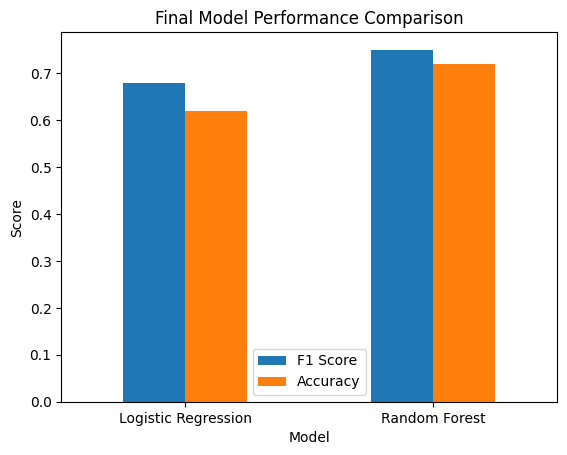

In [ ]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "F1 Score": [0.68, 0.75],
    "Accuracy": [0.62, 0.72]
})

results.set_index("Model").plot(kind="bar")
plt.title("Final Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


As we can see from this graph, Random forest is able to outperform Logistic regression in both Accuracy and F1 Score.

indicating its stronger ability to capture non-linear relationships in the dataset.

**1. Model Perfomance**

Random Forest achieved the best overall performance, with higher accuracy and F1-score than Logistic Regression and the Neural Network.

Logistic Regression showed weaker performance, indicating difficulty in capturing non-linear patterns.

The Neural Network achieved reasonable accuracy but struggled with minority classes.

Overall, ensemble-based methods demonstrated better generalization on this dataset

**2. Impact of Applied Methods**

Cross-validation helped identify more stable and reliable hyperparameters.

Hyperparameter tuning reduced overfitting, especially for the Random Forest model.

Feature selection reduced model complexity but caused a slight drop in test performance.

This suggests that some informative encoded features were removed during feature selection.

**3. Insights and future Directions**


Class imbalance significantly affected prediction performance for severe accident classes.

Ensemble models proved effective for complex, real-world classification problems.

Future improvements could include class balancing techniques such as SMOTE or cost-sensitive learning.

Incorporating temporal or geographic features may further improve model accuracy.